# Applying Regularization Techniques on MNIST (Image) Dataset

2024-03-27 14:15:29.342857: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


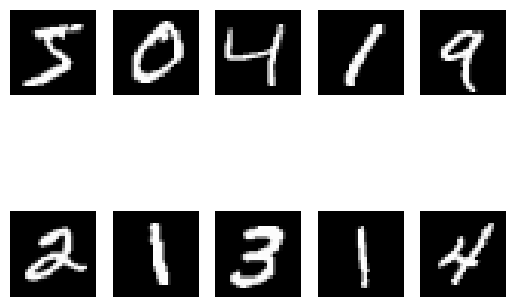

In [1]:
# Import necessary libraries
from keras.datasets import mnist
import matplotlib.pyplot as plt

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Display first 10 images from the training dataset
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')
plt.show()

# Preprocess the Data
Preprocess the data by normalizing the pixel values and splitting the dataset into training and testing sets.

In [2]:
# Normalize the pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten the images
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

# Split the training data into training and validation sets
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [3]:
print(train_images.shape)
print(test_images.shape)

(48000, 784)
(10000, 784)


# Apply L1 Regularization (Lasso)
Apply L1 regularization technique (Lasso) to the training data and evaluate the model on the testing data.

In [4]:
# Import necessary libraries for L1 regularization
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Convert labels to categorical
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)
test_labels = to_categorical(test_labels)

# Create a model with L1 regularization
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,), kernel_regularizer=regularizers.l1(0.001)))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=1, validation_data=(val_images, val_labels))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)

# Print the test accuracy
print('Test accuracy:', test_acc)

2024-03-27 14:15:36.789244: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


313/313 [==============================] - 11s 35ms/step - loss: 0.7140 - accuracy: 0.9153
Test accuracy: 0.9153000116348267


# Apply L2 Regularization (Ridge)
Apply L2 regularization technique (Ridge) to the training data and evaluate the model on the testing data.

In [5]:
# Import necessary libraries for L2 regularization
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Create a model with L2 regularization (Ridge)
model_ridge = Sequential()
model_ridge.add(Dense(512, activation='relu', input_shape=(784,), kernel_regularizer=regularizers.l2(0.001)))
model_ridge.add(Dense(10, activation='softmax'))

# Compile the model
model_ridge.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_ridge = model_ridge.fit(train_images, train_labels, epochs=1, validation_data=(val_images, val_labels))

# Evaluate the model on the test data
test_loss_ridge, test_acc_ridge = model_ridge.evaluate(test_images, test_labels)

# Print the test accuracy
print('Test accuracy with L2 regularization:', test_acc_ridge)

313/313 [==============================] - 10s 32ms/step - loss: 0.2625 - accuracy: 0.9557
Test accuracy with L2 regularization: 0.9556999802589417


# Apply Combined L1 and L2 Regularization (Elastic Net)
Apply combined L1 and L2 regularization technique (Elastic Net) to the training data and evaluate the model on the testing data.

In [6]:
# Import necessary libraries for combined L1 and L2 regularization
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense

# Create a model with combined L1 and L2 regularization (Elastic Net)
model_elastic = Sequential()
model_elastic.add(Dense(512, activation='relu', input_shape=(784,), kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model_elastic.add(Dense(10, activation='softmax'))

# Compile the model
model_elastic.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_elastic = model_elastic.fit(train_images, train_labels, epochs=1, validation_data=(val_images, val_labels))

# Evaluate the model on the test data
test_loss_elastic, test_acc_elastic = model_elastic.evaluate(test_images, test_labels)

# Print the test accuracy
print('Test accuracy with combined L1 and L2 regularization:', test_acc_elastic)

313/313 [==============================] - 11s 34ms/step - loss: 0.8144 - accuracy: 0.8890
Test accuracy with combined L1 and L2 regularization: 0.8889999985694885


# Compare the Results
Compare the results of the three regularization techniques in terms of their performance metrics.

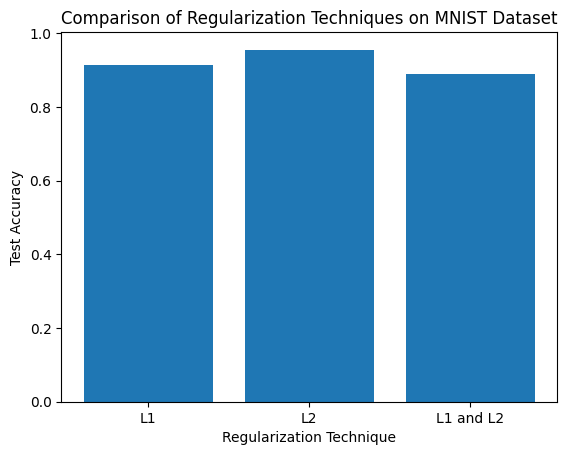

In [7]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import numpy as np

# Define the list of models
models = ['L1', 'L2', 'L1 and L2']

# Define the list of accuracies
accuracies = [test_acc, test_acc_ridge, test_acc_elastic]

# Plot the comparison
plt.bar(models, accuracies)
plt.xlabel('Regularization Technique')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Regularization Techniques on MNIST Dataset')
plt.show()

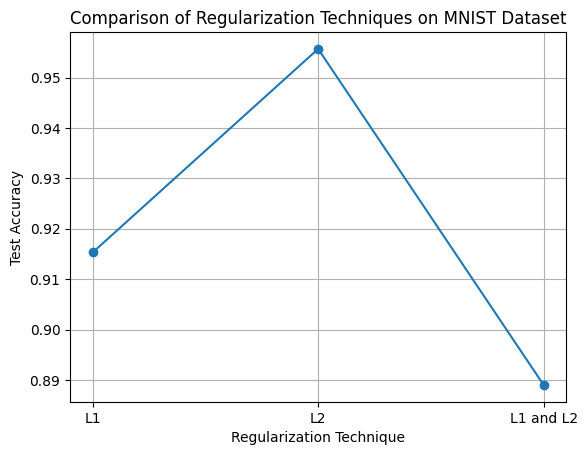

In [8]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import numpy as np

# Define the list of models
models = ['L1', 'L2', 'L1 and L2']

# Define the list of accuracies
accuracies = [test_acc, test_acc_ridge, test_acc_elastic]

# Plot the comparison
plt.plot(models, accuracies, marker='o')
plt.xlabel('Regularization Technique')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Regularization Techniques on MNIST Dataset')
plt.grid(True)
plt.show()

# Plot Confusion Matrices
Plot the confusion matrices for the predictions made by the models trained with each regularization technique.

313/313 [==============================] - 7s 21ms/step


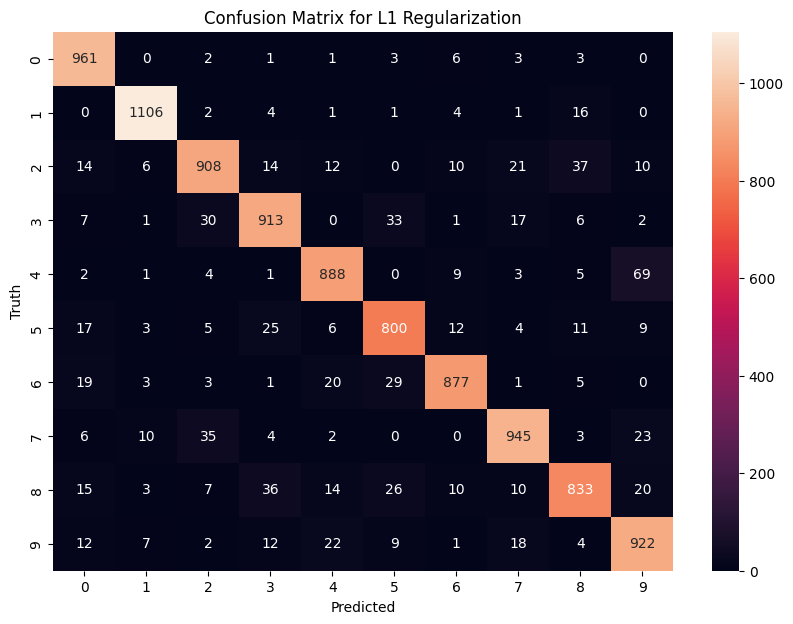

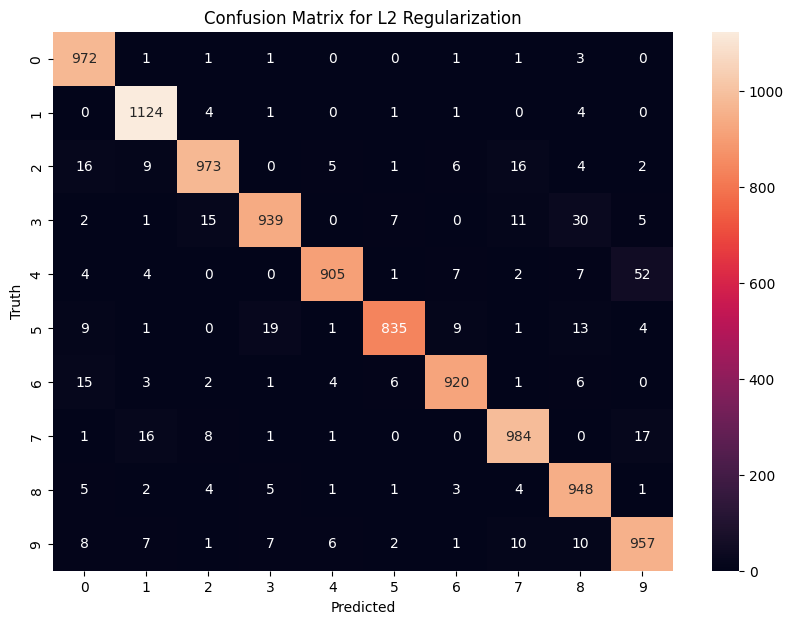

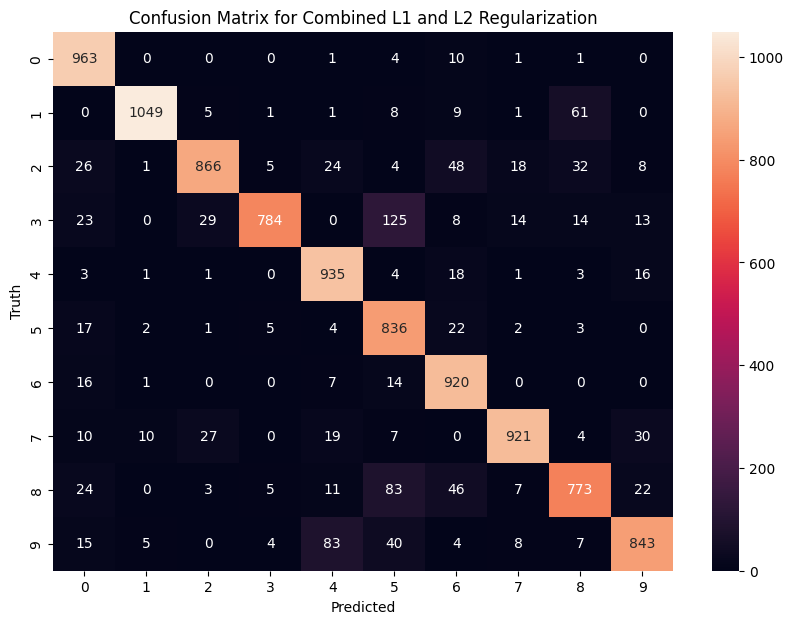

In [9]:
# Import necessary libraries for confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the labels for test data
pred_probs = model.predict(test_images)
pred_probs_ridge = model_ridge.predict(test_images)
pred_probs_elastic = model_elastic.predict(test_images)

# Get the class with the highest probability
pred_labels = np.argmax(pred_probs, axis=1)
pred_labels_ridge = np.argmax(pred_probs_ridge, axis=1)
pred_labels_elastic = np.argmax(pred_probs_elastic, axis=1)

# Convert test labels back to original form
test_labels_orig = np.argmax(test_labels, axis=1)

# Compute confusion matrices
cm = confusion_matrix(test_labels_orig, pred_labels)
cm_ridge = confusion_matrix(test_labels_orig, pred_labels_ridge)
cm_elastic = confusion_matrix(test_labels_orig, pred_labels_elastic)

# Plot confusion matrix for L1 regularization
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for L1 Regularization')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Plot confusion matrix for L2 regularization
plt.figure(figsize=(10,7))
sns.heatmap(cm_ridge, annot=True, fmt='d')
plt.title('Confusion Matrix for L2 Regularization')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Plot confusion matrix for combined L1 and L2 regularization
plt.figure(figsize=(10,7))
sns.heatmap(cm_elastic, annot=True, fmt='d')
plt.title('Confusion Matrix for Combined L1 and L2 Regularization')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Print Classification Report

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define the regularization methods
regularizations = ['l1', 'l2']

for regularization in regularizations:
    # Train the model with the specified regularization
    model = LogisticRegression(penalty=regularization, solver='liblinear')
    
    # Convert one-hot encoded labels back to label-encoded form
    train_labels_encoded = np.argmax(train_labels, axis=1)
    
    model.fit(train_images, train_labels_encoded)

    # Predict the labels for test data
    pred_labels = model.predict(test_images)

    # Convert one-hot encoded test labels back to label-encoded form
    test_labels_encoded = np.argmax(test_labels, axis=1)

    # Generate the classification report
    report = classification_report(test_labels_encoded, pred_labels)

    # Print the classification report
    print(f"Classification report for {regularization} regularization:\n")
    print(report)
    print("\n")

Classification report for l1 regularization:

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.88      0.91      1032
           3       0.90      0.91      0.90      1010
           4       0.92      0.93      0.93       982
           5       0.90      0.86      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.92      1028
           8       0.87      0.87      0.87       974
           9       0.90      0.89      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



Classification report for l2 regularization:

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.96      0.98     